# SVM으로 분석하는 이미지
- https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
- 딥러닝(2007년 이미지넷 프로젝트 이후에 검증이 되었음)
    - 딥러닝은 최대한 공식을 사용하지 않고 w(weight),b(bias)값을 무작위로 주고, 값을 업데이트하면서 오차를 줄여나가는 과정
    - y값이 예측, 이항분류, 다항분류에 따라서 y_hat과 w,b 갱신 공식이 달라짐
- 비정형 데이터(이미지 등) 분석은 2007년 이전 또는 텐서플로우(2015년, 딥러닝 수학 계산식이 포함된 모듈)가 나오긴 전 svm의 통계학 코드로 작업함.
- 머신러닝으로 분석하면 시간이 많이 걸리기 때문에 현재는 딥러닝 사용<br>
<br>
- SVM(서포트 벡터 머신, support vector machine)
    - https://bskyvision.com/163
    - 기계 학습의 분야 중 하나로 패턴 인식, 자료 분석을 위한 **지도 학습** 모델
    - 선형 분류와 더불어 비선형 분류에서도 사용
    - 비슷한 값끼리 모으기 때문에 **응집도는 최대화 분산은 최소화**함.
    - class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)
    - degree 차수
    - SVM 알고리즘 중에서 가장 성능이 괜찮고 일반적으로 널리 사용되는 것은 **RBF 커널 SVM**이다.
    - 좋은 성능을 얻으려면 매개변수인 **C와 gamma**를 잘 조정해줘야 한다.
        - C는 데이터 샘플들이 다른 클래스에 놓이는 것을 허용하는 정도를 결정하고, gamma는 결정 경계의 곡률을 결정한다.
        - 두 값 모두 **커질수록 알고리즘의 복잡도는 증가**하고, **작아질수록 복잡도는 낮아**진다.
        - 두 값이 크면 **과대적합**, 작으면 **과소적합**이 될 위험이 있다.
        - 일반적으로 grid search로 경험적으로 최적의 매개변수 값들을 찾는다.

In [1]:
import numpy as np

In [2]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [6]:
a = np.array([2,3,3])
b = np.array([2,2,3])
tmp=[a,b]
tmp

[array([2, 3, 3]), array([2, 2, 3])]

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


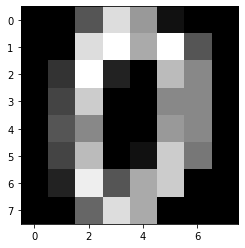

In [12]:
digits = datasets.load_digits() # 서로 다른 갯수로 되어있거나 같은 갯수여도 따로 입력된 경우
print(digits.images[0]) # 8x8의 이미지 파일, 숫자 0은 검정색
plt.imshow(digits.images[0], cmap='gray')
plt.show()

8


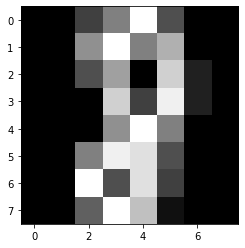

In [19]:
cnt = 53
print(digits.target[cnt])
plt.imshow(digits.images[cnt], cmap='gray')
plt.show()

In [22]:
print(len(digits.target), len(digits.images))
print(np.shape(digits.target), np.shape(digits.images))

1797 1797
(1797,) (1797, 8, 8)


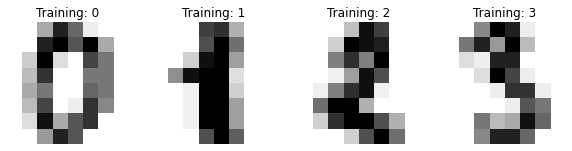

In [23]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [24]:
# 모든 머신러닝은 가로*세로를 이해하지 못 함.
# 가로*세로값을 가로로 모두 변경해야 함
# 현재 8*8이라면 64개로 변경해서 x1, x2, x3,...,x64의 x변수를 제작함.
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1)) # (1797, 8, 8) --> (1797, -1) 즉 (1797, 64)로 변경
data.shape

(1797, 64)

In [35]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test) # X_test에 있는 이미지를 분석한 결과의 y레이블 값
predicted[:5] 

array([8, 8, 4, 9, 0])

In [30]:
print(X_test.shape)
X_test[0].reshape(8,8).shape

(899, 64)


(8, 8)

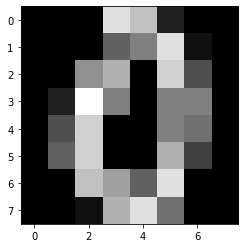

In [37]:
cnt = 4
tmp = X_test[cnt].reshape(8,8) 
plt.imshow(tmp, cmap='gray')
plt.show()

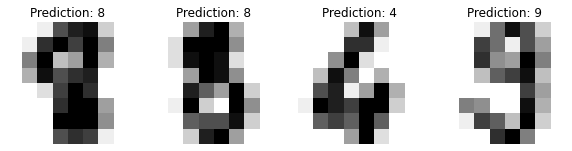

In [38]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8) # 현재 64개의 x변수로 되어 있음. 이걸 가로*세로로 변경해서 보여줘야 함
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [39]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

(8, 8)
77 0


array([1])

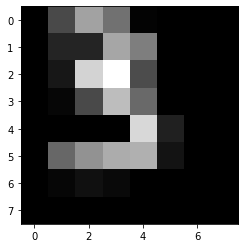

In [41]:
from PIL import Image
img=Image.open('sample.png')
img=img.convert('L') # 흑백변환
img=img.resize((8,8)) # 사이즈 맞춰야 함
arr=np.array(img) # 배열로 변환
print(arr.shape)

print(arr.max(), arr.min())

plt.imshow(arr,cmap='gray')
newX=arr.reshape(1,-1) # 64 x값으로 변환

clf.predict(newX)
# 예측모델을 작업한 SVM에 입력한 사진과 같은 스케일링 작업이 필요함(하지않아서 정확도가 낮음)
# minmaxScaler 또는 standardScaler가 필요하지만 무엇이 맞는지는 알 수 없음